<a href="https://colab.research.google.com/github/shreyashrestha07/CUS615_ShreyaShrestha/blob/master/Problem_set_06_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.


## Problem Set 06 : Workshop on using PCA
This problem set is intended as a workshop to practice the use of Singular Value Decomposition and Principal Component Analysis as two ways to perform Matrix Factorization and Dimensionality Reduction. 



In [234]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## Challenge 1: Apply PCA on sample data - using numpy. 
In this section you need to apply PCA on a simulated dataset. You need to extract the prinipal components and use them to reduce the dimensionality of the data. For this challenge **do not use** sklearn library. Some starting code is provided for you in each cell. Complete all the exercises to earn all points in this challenge. 

In [235]:
# Generate the dataset, split it into 
rng = np.random.RandomState(4)     # Seed the random number generator.
n_samples = 1000                    # Specify the number of samples. 
X_all = np.array([5,1,1,1,2]).T + np.dot(rng.rand(5, 5), rng.randn(5, n_samples)).T 
X_train, X_test = X_all[:n_samples//2,:],X_all[n_samples//2:,:] 

### Answer the following question.
Use the cell below to find the answer to the following questions. 

- What is the dimensions of `X_train` and `X_test`?
- How many `features` does each sample has (i.e. what is the dimensionality of the observations in data matrix X_all)?
- Create three 2D scatter plots to show the relationship between to features-pairs (1,2), (1,4), (3,4)? Make sure you label each scatter plot. 

As an example, the following code create a scatter plot between the 1st and 3rd feature dimension
```python 
plt.scatter(X_train[:,1],X_train[:,3])
plt.title("Scatter plot between feature 2 and feature 4")
plt.xlabel("Feature 2")
plt.ylabel("Feature 4")
plt.axis("square")

``` 

In [236]:
# Solution 1:

# 1. What is the dimensions of X_train and X_test?
print(f"Dimention of X_train:{X_train.shape} Dimention of X_test:{X_test.shape}")

# 2. How many features does each sample has (i.e. what is the dimensionality of the observations in data matrix X_all)?
X_all, X_features = X_train.shape
print("\nNumber of features: "+ str(X_features))


Dimention of X_train:(500, 5) Dimention of X_test:(500, 5)

Number of features: 5


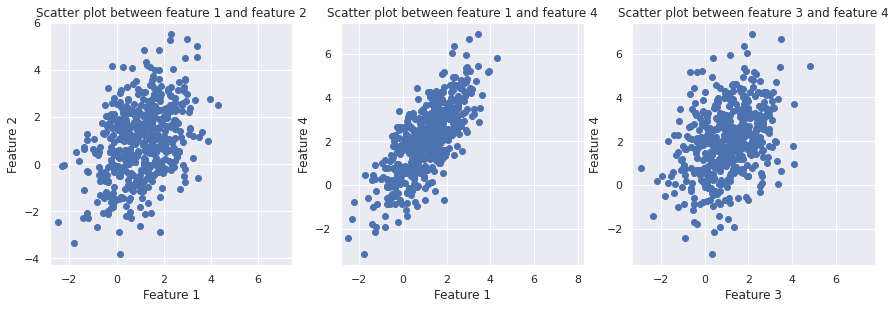

In [237]:
# 2. Create three 2D scatter plots to show the relationship between to features-pairs (1,2), (1,4), (3,4)? Make sure you label each scatter plot.
# Display the scatter plot between the feature pairs (1,2), (1,4), (3,4) 

plt.figure(figsize=(20,10))

# Plot the scatter plot between feature-pair (1,2) 
plt.subplot(1,4,1)
plt.scatter(X_train[:,1],X_train[:,2])
plt.title("Scatter plot between feature 1 and feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("square")


# Plot the scatter plot between feature-pair (1,4)
plt.subplot(1,4,2)
plt.scatter(X_train[:,1],X_train[:,4])
plt.title("Scatter plot between feature 1 and feature 4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 4")
plt.axis("square")

# Plot the scatter plot between feature-pair (3,4)
plt.subplot(1,4,3)
plt.scatter(X_train[:,3],X_train[:,4])
plt.title("Scatter plot between feature 3 and feature 4")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.axis("square")


plt.show()


### Exercise 1.1 : Calculate the covariance matrix.
Calculate the covariance matrix of the training data matrix `X_train`. Show all you steps as outlined in the skeleton code provided. In particular, you need to 
calculate the observations' mean; subtract the mean from the data matrix; standardize the observations by dividing each feature with its corresponding standard deviation; and calculate the covarnace matrix. 

**Hints**
  - Notice that you can find the mean of an array `A` along a particular dimension `b`, using the numpy command `np.mean(A,axis=b)`. In case `b=0` the mean is taken along the 0th dimension (i.e along the rows), when `b=1` the mean is taken along the 1st dimension (i.e. along the columns). Similarly, you can find the standard deviation of the array using the command `np.std(A,axis=b)` 

  - Python `broadcasting` allows you to perform artithmetic operation on arrays with different sizes, thus vectorizing the arithmetic operations and eliminates the need for using inefficent for loops. The following example shows how boradcasting is used to add  a row vector from every row in the 2D array.
  ```python
    # Example of using broadcasting
    sample = np.array([[2,4], [10,-5]])
    to_add = np.array([3,7])
    sample_add_using_broadcasting  = sample + to_add 
    print(sample)
    print(sample_add_using_broadcasting)
  ``` 
  - The covariance matrix of a data matrix $X\in \mathbb{R}^{N\times D}$(i.e. a matrix with $N$ rows/observations and $D$ columns/features is defined as 
    $\frac{1}{N-1} X^T X$ where the term $\frac{1}{N-1}$ is the normalization constant, and $^T$ denotes the matrix transpose. 
     In numpy, we can multiply two numpy arrays/matrices using the `np.matmul()` method and we can transpose a matrix by accessing the `.T`  property of the array (i.e. `np.matmul(X.T,X)`).


In [238]:
# Calcualte the mean of X_train
X_mean = np.mean(X_train, axis = 0)
print(X_mean)

# Subtract the mean from 
X_train_mean_subtracted = X_train -  X_mean
print(X_train_mean_subtracted)


# Standarized observation to unit variance (i.e. divide by standard deviation)
X_std = np.std(X_train_mean_subtracted,axis=0)
print(X_std)


X_train_std = X_train_mean_subtracted / X_std
print(X_train_std)

# Calculate the covariance of the standarized observations.
# Make sure you use the appropripate normalization constant 
train_len, train_feat = X_train.shape
X_train_cov = np.matmul(X_train_std.T, X_train_std)/(train_len -1)
X_train_cov

[5.03317333 1.03720153 1.00380632 1.03496065 2.02575597]
[[ 1.4289805  -1.390424    2.24544536  1.02856736  0.27101512]
 [-1.27273685  0.54727375 -1.46685941 -0.65602426 -0.54349768]
 [ 3.06282082  1.83665496  2.09239065  0.76389244  3.3339006 ]
 ...
 [-2.11206135  0.81819636 -3.87234825  0.95505694 -2.72012782]
 [-0.24295296 -1.31032956  1.07868144 -1.74570035  0.62425073]
 [-2.57533739  0.41142408 -3.09085067 -0.34893357 -2.29962803]]
[1.74728827 1.12531989 1.54547257 1.18160906 1.57434041]
[[ 0.81782756 -1.23558111  1.45291829  0.87048026  0.17214519]
 [-0.72840691  0.48632727 -0.94913326 -0.55519569 -0.34522247]
 [ 1.75289955  1.6321181   1.35388404  0.64648492  2.11764913]
 ...
 [-1.20876526  0.72707891 -2.50560788  0.80826812 -1.72778886]
 [-0.13904572 -1.1644063   0.6979622  -1.47739249  0.39651573]
 [-1.47390527  0.36560634 -1.99993887 -0.29530374 -1.46069301]]


array([[1.00200401, 0.59615502, 0.91194702, 0.75460585, 0.8632635 ],
       [0.59615502, 1.00200401, 0.36660994, 0.38650954, 0.73888442],
       [0.91194702, 0.36660994, 1.00200401, 0.50077827, 0.85131988],
       [0.75460585, 0.38650954, 0.50077827, 1.00200401, 0.36278094],
       [0.8632635 , 0.73888442, 0.85131988, 0.36278094, 1.00200401]])

In [239]:
X_train_cov


array([[1.00200401, 0.59615502, 0.91194702, 0.75460585, 0.8632635 ],
       [0.59615502, 1.00200401, 0.36660994, 0.38650954, 0.73888442],
       [0.91194702, 0.36660994, 1.00200401, 0.50077827, 0.85131988],
       [0.75460585, 0.38650954, 0.50077827, 1.00200401, 0.36278094],
       [0.8632635 , 0.73888442, 0.85131988, 0.36278094, 1.00200401]])

#### Answer the following questions:
Use the cell below to answer the following questions and show your work.

- Print the content of the covariance matrix.
- What are the dimensions of the covariance matrix `X_train_cov` 
- What values do you see on the diagonal elements of the covariance matrix.
- Which feature-pairs have the largest covariance value; what is that value. 

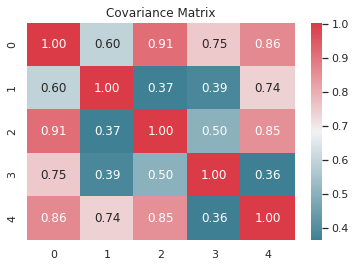

Dimention of X_train:(5, 5)
All the diagonal values are 1.00
Feature pair 0 and 2 have the larget covariance


In [240]:

# Complete the code below to display a heatmap of the Covariance matrix 
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(X_train_cov, cmap= colormap, annot=True, fmt=".2f")
plt.title("Covariance Matrix")
plt.show()

# 1 What are the dimensions of the covariance matrix X_train_cov
print(f"Dimention of X_train:{X_train_cov.shape}")

#2 What values do you see on the diagonal elements of the covariance matrix.
print("All the diagonal values are 1.00")

#3 Which feature-pairs have the largest covariance value; what is that value.
print("Feature pair 0 and 2 have the larget covariance")


### Exercise 1.2: Estimate the Eigen-vectors and Eigen-values of the covariance matrix. 
The principal components of a covariance matrix are the eigen-vectors of the covariance matrix. The variance of each principal component is proportional to the eigen-value of its corresponding eigen-vector. 

As part of this exercise you need to extract the two the principal component of the covariance matrix that have the highest variance. Then answer the following questions. 

**Hints**
- The numpy method `eigh` can be used to estimate the eighen-vectors and eigen-values of a square symetric matrix. For example, 
```python 
  a_symetric_square_matrix = np.array([[1,0.7],[0.7, 1]])
  eig_vals, eig_vecs  = np.linalg.eigh(a_symetric_square_matrix)
```




In [241]:
#
# Calculate the eigenvectors and eigenvalues of the covariance matrix. 
# 

eig_vals, eig_vecs = np.linalg.eigh(X_train_cov)

eig_vecs

array([[ 0.80197961,  0.21928515,  0.0745078 ,  0.18273974, -0.51942035],
       [ 0.0499954 , -0.39466047, -0.60780424, -0.57367564, -0.37843605],
       [-0.21006688, -0.6343982 ,  0.56547166,  0.1267296 , -0.46646783],
       [-0.36856801,  0.08015657, -0.50259801,  0.68653272, -0.36578764],
       [-0.41756279,  0.622311  ,  0.22947687, -0.38744661, -0.48538214]])

In [242]:
eig_vals

array([0.00402957, 0.01647728, 0.62848952, 0.76759502, 3.59342865])

#### Answer the following questions. 
Use the code-cell below to find the answer to the following questions and show your work.
- Print the eigen-vector with the largest eigen-value, also print the eigen-value itself, and the index of the vector in the `eig_vecs` matrix

- Print the eigen-vector with the second largest eigen-value, also print the eigen-value itself, and the index of the vector in the `eig_vecs` matrix

- Calculate the percentage of the variance in the data that is captured by the three eigen-vectors with the largest eigen-values.

- Calculate the total variance captured by the two eigen-vectors with the smallest eigen-values. 

- What is the minimum number of principal component you can use to ensure that the least `85%` of the variance is captured in the reduced dataset.  

In [243]:
# 1. Print the eigen-vector with the largest eigen-value, also print the eigen-value itself, and the index of the vector in the eig_vecs matrix
print("Eigen Vector with the largest eigen-value is:",(eig_vecs[np.argmax(eig_vals)]))
print("Index of the vector with the largest eigen-value is: ", np.argmax(eig_vals))
print("Largest eigen-value: ",eig_vals.max())

# 2. Print the eigen-vector with the second largest eigen-value, also print the eigen-value itself, and the index of the vector in the eig_vecs matrix
print("\nEigen Vector with the second largest eigen-value is:",(eig_vecs[np.argmax(eig_vals)-1]))
print("Index of the vector with the second largest eigen-value is: ", np.argmax(eig_vals)-1)
print("Second largest eigen-value: ",eig_vals[3])

# 3. Calculate the percentage of the variance in the data that is captured by the three eigen-vectors with the largest eigen-values.
var_sum = np.sum(eig_vals)

variablesExplained = [(i / var_sum) for i in sorted(eig_vals, reverse =True)]
print(variablesExplained)
per_largest3 = round(float(sum(variablesExplained[0:3])*100),2)
print("\nThe percentage of variance in the data that i captured by the three eigen-vectors with the largest eigen-values are : ", (per_largest3))

# 4. Calculate the total variance captured by the two eigen-vectors with the smallest eigen-values.
per_smallest2 = round(float(sum(variablesExplained[3:])*100),2)
print("\nThe total variance captured by the two eigen-vectors with the smallest eigen-values are : ", per_smallest2)


# What is the minimum number of principal component you can use to ensure that the least 85% of the variance is captured in the reduced dataset.
min_variance = sum(variablesExplained[:2])*100
if min_variance > 85:
  print("\nWe need minimum 2 principal components to capture atleast 85% of variance in the reduced dataset ")
else:
  print("\nWe need minimum 3 principal components to capture atleast 85% of variance in the reduced dataset ")

Eigen Vector with the largest eigen-value is: [-0.41756279  0.622311    0.22947687 -0.38744661 -0.48538214]
Index of the vector with the largest eigen-value is:  4
Largest eigen-value:  3.593428653505268

Eigen Vector with the second largest eigen-value is: [-0.36856801  0.08015657 -0.50259801  0.68653272 -0.36578764]
Index of the vector with the second largest eigen-value is:  3
Second largest eigen-value:  0.7675950160113192
[0.7172483592396515, 0.1532119651958593, 0.12544650867761226, 0.0032888651456713727, 0.0008043017412056445]

The percentage of variance in the data that i captured by the three eigen-vectors with the largest eigen-values are :  99.59

The total variance captured by the two eigen-vectors with the smallest eigen-values are :  0.41

We need minimum 2 principal components to capture atleast 85% of variance in the reduced dataset 


### Exercise 1.3 Dimensionality Reduction using Principal Components
Use the principal component you calculated in the previous step to reduce the dimensionality of the feature space. 

- First, you must identify the two principal component with the highest variance (i.e. using the eigen-values you calculated in the previous code-cells).Then append the two principal components into their own matrix `PCA_mx` such that the metrix columns correspond to the selected Principal Components. 

- Use the resulting matrix `PCA_mx` to reduce the dimensions in the training set; from its original dimension down to two dimentions. You can do that by multiplying the *standaraized* training set X_train_std with the principal component's matrix `PCA_mx`. Store the resulting reduced-dimensionality training set into a variable `X_train_proj` 

- Use the resulting matrix `PCA_mx` to reduce the dimensions in the testing set; `X_test`. (*Hint: you must first standardize the testing set; using only quantities you calculated from the training set. Remember, standardization is the process of transforming the data to zero mean, and unit standard deviation*). Store the resulting reduced-dimensionality training set into a variable `X_test_proj`    




In [244]:

# Create a matrix whose columns are the two major principal component.
PCA_mx = eig_vecs[:,[3,4]]
print(PCA_mx)

# Project the training set X_train onto the two major principal Components. 
# Use the matrix PCA_mx 

X_train_proj = X_train_mean_subtracted.dot(PCA_mx)
print(X_train_proj)


[[ 0.18273974 -0.51942035]
 [-0.57367564 -0.37843605]
 [ 0.1267296  -0.46646783]
 [ 0.68653272 -0.36578764]
 [-0.38744661 -0.48538214]]
[[ 1.94448956e+00 -1.77126613e+00]
 [-9.72237518e-01  1.64198966e+00]
 [-9.96048627e-01 -5.15961905e+00]
 [ 1.04974440e+00  1.62958956e+00]
 [-3.07783955e+00 -4.10338077e-01]
 [-1.60543355e+00  3.58430374e+00]
 [ 9.03461448e-01  1.48885883e+00]
 [-8.33546244e-01 -2.67836728e+00]
 [ 8.35126698e-01 -4.03209239e+00]
 [ 1.35656466e+00 -8.44692237e+00]
 [-1.89757673e+00 -7.32973360e-02]
 [ 1.42017016e+00  6.73312428e-01]
 [ 1.17252678e+00  8.12449933e+00]
 [ 2.04462303e+00 -5.25315420e-01]
 [ 1.26769074e+00  1.73508981e+00]
 [ 5.52010761e-01 -7.30902111e-02]
 [ 3.56076547e-01  4.70384309e+00]
 [ 5.22208230e-01  7.06828986e-01]
 [ 1.30595245e+00 -5.18909871e+00]
 [-5.01564371e-01 -1.05929435e+00]
 [ 3.06842628e-01 -1.10329893e+00]
 [-1.44823291e-02  8.37419377e-01]
 [ 1.94139037e-01 -1.94196622e+00]
 [-1.19774095e+00  2.01821011e+00]
 [ 7.95793614e-01 -4.822

In [245]:
# Project the test dataset X_test onto the two major principal components
# See hint for answering. 

X_test_mean = np.mean(X_test,axis=0)
print(X_test_mean)

X_test_mean_subtracted = X_test - X_test_mean
print(X_test_mean_subtracted)

X_std = np.std(X_test_mean_subtracted,axis=0)
print(X_std)

X_test_std = X_test_mean_subtracted / X_std
print(X_test_std)

X_test_proj = X_test_mean_subtracted.dot(PCA_mx)
print(X_test_proj)


[5.02925453 1.00071417 1.0448517  0.97906678 2.04327192]
[[-1.59282245 -1.93538512 -0.34555996 -1.12342246 -1.61765835]
 [ 0.47340335 -0.90931477  0.79413184  0.50245786 -0.04470548]
 [ 1.92628035  2.0494371  -0.16385052  1.5575779   1.33924529]
 ...
 [-0.03433081 -0.43883604 -0.20635764  0.26301174 -0.20062024]
 [-1.6468013   0.96867614 -1.79402247 -0.76523549 -0.74171292]
 [-0.54551723  0.91434444 -0.93210756 -0.27450816 -0.15444433]]
[1.73826815 1.06968485 1.50359956 1.13086017 1.52078949]
[[-0.91632724 -1.80930403 -0.2298218  -0.99342296 -1.06369643]
 [ 0.27234196 -0.85007726  0.52815381  0.44431476 -0.02939623]
 [ 1.10816064  1.91592607 -0.10897218  1.37733907  0.88062503]
 ...
 [-0.01975001 -0.41024797 -0.13724242  0.23257671 -0.13191848]
 [-0.94738047  0.90557152 -1.19315177 -0.67668445 -0.48771571]
 [-0.31382801  0.85477927 -0.61991742 -0.2427428  -0.10155537]]
[[ 6.30908621e-01  2.91707303e+00]
 [ 1.07107610e+00 -4.34308427e-01]
 [-2.94026719e-01 -2.91948759e+00]
 [-4.05668079

#### Answer the following questions
Use the code-cells below to find the anwers to the following question, and display the requested figures.

- What is the shape of the matrix `X_train_proj` and what does each dimension represents. 

- What is the shape of the matrix `X_test_proj` and what does each dimension represents. 

- Display a scatter-plot showing the `X_train_proj` data.

- Display a scatter-plot showing the `X_test_proj` data. 

- Calculate the covariance matrix of `X_train_proj` and identify what is the covariance between the first and second features. 

- Calculate the covariance matrix of `X_test_proj` and identify what is the covariance between the first and second features. 





In [246]:

# Use this code-cell to find the answer to the questions above. 
# 1. What is the shape of the matrix X_train_proj and what does each dimension represents.
print('The shape of X_train_proj is {}'.format(X_train_proj.shape))
print('Each dimension represents 2 principal components we have chosen')

# 2. What is the shape of the matrix X_test_proj and what does each dimension represents.
print('\nThe shape of X_test_proj is {}'.format(X_test_proj.shape))
print('Each dimension represents 2 principal components we have chosen')

The shape of X_train_proj is (500, 2)
Each dimension represents 2 principal components we have chosen

The shape of X_test_proj is (500, 2)
Each dimension represents 2 principal components we have chosen


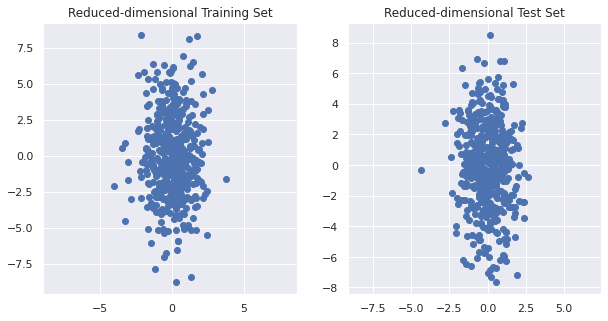

In [247]:
# 3. Display a scatter-plot showing the X_train_proj data.

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_train_proj[:,0],X_train_proj[:,1])
plt.title("Reduced-dimensional Training Set")
plt.axis('equal')

# 4. Display a scatter-plot showing the X_test_proj data.
plt.subplot(1,2,2)
plt.scatter(X_test_proj[:,0],X_test_proj[:,1])
plt.title("Reduced-dimensional Test Set")
plt.axis('equal')
plt.show()

In [248]:
 # 5. Calculate the covariance matrix of X_train_proj and identify what is the covariance between the first and second features.

 # Calcualte the mean of X_train_proj
X_mean = np.mean(X_train_proj, axis = 0)


# Subtract the mean from the data matrix
X_train_proj_mean_subtracted = X_train_proj - X_mean

# Standarized observation to unit variance 
X_std = np.std(X_train_proj, axis = 0)
X_train_std = X_train_proj_mean_subtracted / X_std

# Calculate the covariance of the standarized observations.
# Make sure you use the appropripate normalization constant 

train_len, train_feat = X_train_proj.shape
X_train_cov = np.matmul(X_train_std.T, X_train_std)/(train_len -1)
print('The covariance between the first and second features for X_train_proj is {}'.format(X_train_cov[1][0]))

# 6. Calculate the covariance matrix of X_test_proj and identify what is the covariance between the first and second features.

 # Calcualte the mean of X_test_proj
X_mean = np.mean(X_test_proj, axis = 0)


# Subtract the mean from the data matrix
X_test_proj_mean_subtracted = X_test_proj - X_mean

# Standarized observation to unit variance 
X_std = np.std(X_test_proj, axis = 0)
X_test_std = X_test_proj_mean_subtracted / X_std

# Calculate the covariance of the standarized observations.
# Make sure you use the appropripate normalization constant 

test_len, test_feat = X_test_proj.shape
X_test_cov = np.matmul(X_test_std.T, X_test_std)/(test_len -1)
print('\nThe covariance between the first and second features for X_test_proj is {}'.format(X_test_cov[1][0]))

The covariance between the first and second features for X_train_proj is -0.026973969727015226

The covariance between the first and second features for X_test_proj is -0.05975003605912002


## Challenge 2: Apply PCA on sample data - Using the sklearn library

Principal Component Analysis is often used as a pre-processing and dimenionality-reductiion step in predictive modeling. As such, the sklearn library provides a helper class that encapulates the step of extracting the principal component. 

Specifically, sklearn library provides the `PCA` class as part of its `sklearn.decomposition` module. You can clear a new instance of the PCA class as follows:
```python 
  pca = PCA(n_components=2) 
```
Notice the the variable `n_components` specifies the number of principal components we want to keep as part of the dimensionality reduction. 

To apply the PCA class, we must make sure that we standardize the dataset, that is to transform the data so they have zero mean and unit variance. Sklearn provides another helper function the  performnce the standardization of the data. The `StandardScaler` class, part of the `sklearning.preprocessing` module achieves that. For example, the following code would standardize a matrix X
```python 
D = np.array([[1,2],[4,9],[1,5],[7,19],[4,9]])
sc = StandardScaler()
sc.fit_transform(D)        # Learn the standardization parameters (i.e. mean, std parameters)
D_std = sc.transform(D)    # Standardize the dataset D

np.cov(D_std.T, ddof=False)# Check the covariance matrix.
```

Once the dataset is standardized, we can extract the principal components using the `fit` method of the `PCA` class, for example using

```python 
pca.fit(D_std)
``` 
Notice that under the hood the fit method creates the covariance matrix, and solves the eigen-vector/eigen-value problem. 

The principal components (i.e. eigen-vectors) and their explained variance (i.e. corresponding eigen-value) can be retrived from the fitted `pca` instance through the `explained_variance_` and `components_` attributes, such as 
```python
print("Extracted Principal Components (i.e. eigen-vectors")
print(pca.components_)

print("Explained variabce of extracted components (i.e. eigen-values)
print(pca.explained_variance_)
```
Finally, project a dataset onto the extracted principal components, we can use the `transform` method of the PCA class. For example,
```python
D_projected = pca.transform(D_std)
``` 
**Exercise**
Using the reference code above, extract the principal components of the same sample dataset (as the one in Challenge 1), but now using the helper classes provided in the sklearn library.  Moreover, reduce the dimensionality of the `X_train` and `X_test` dataset by projecting to the two major principal components. 
 



In [249]:
# Import the sklearn libaries 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

In [250]:
# Create an Instance of the PCA class from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

# Standardize the training and testing dataset. 
sc = StandardScaler()
sc.fit_transform(X_train)
X_train_std = sc.transform(X_train)

# Extract/learn the principal components
pca.fit(X_train_std)
pca.components_
pca.explained_variance_


# Project the train dataset onto the two major principal components. 
X_train_proj_sklearn = pca.transform(X_train_std)

# Project the train dataset onto the two major principal components. 
# Hint: do not forget to standardize the test dataset. 

X_test_std = sc.transform(X_test)
X_test_proj_sklearn = pca.transform(X_test_std)



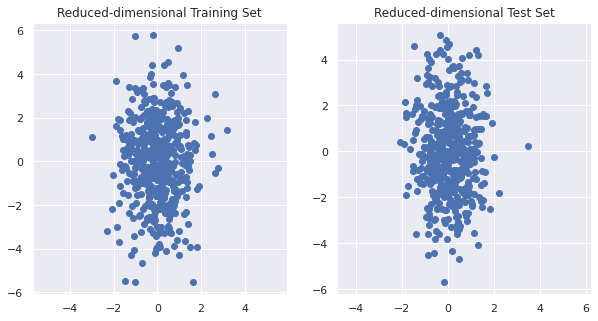

In [251]:
#  Display a scatter-plot showing the `X_train_proj_sklearn` data.

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_train_proj_sklearn[:,1],X_train_proj_sklearn[:,0] )
plt.title("Reduced-dimensional Training Set")
plt.axis('equal')

#  Display a scatter-plot showing the `X_test_proj_sklearn` data. 
#. Hint: See sample code from Challenge 1.
plt.subplot(1,2,2)
plt.scatter(X_test_proj_sklearn[:,1],X_test_proj_sklearn[:,0] )
plt.title("Reduced-dimensional Test Set")
plt.axis('equal')
plt.show()

## Challenge 3: Perform PCA to reduce the dimensions of the wine dataset.

The code-cell below load an example dataset called `wine.data` as a panda's dataframe, and then split it into a training `X_train` and testing dataset `X_test`. Each observation corresponds to a particular wine brand and the features correspond to various characteristics associated with each wine (for example, 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium'). There are total 13 such features for each wine. Moreover, each wine belongs to one of three quality classes (i.e. 1,2 or 3). The class labels for each onservation are stored in the `y_train` and `y_test` vectors. 


In [252]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
                   
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

### Exercise 3.1  

Your goal is to find a classifier to predict the quality class of a wine, given its observed features. You suspect that several of the features covay and that you are better off to reduce the number of dimession of the same before performing the classificaton.

In this exercise you are expected to use PCA to reduce the dimensionality of the original dataset from 13 down to two. Then use the K-NN to train a classifier that predicts the wine quality class. 

Compare the performance of your classifier, to a classifier that uses all 13 features. You must report cross validation performance, and independent test performance. 



In [253]:
#Solution 3.1:
# Make sure you add comments, to explain your code. 

# To reduce the dimentionality form 13 to 2
pca = PCA(n_components = 2)

# To standardize the training and testing dataset
sc = StandardScaler()
sc.fit_transform(X_train)
X_train_std = sc.transform(X_train)

# To extract the principal components
pca.fit(X_train_std)
print(' The Principal Components are: \n {}'.format(pca.components_))

print('\nThe PCA Eigenvalues are: \n {}'.format(pca.explained_variance_))

print('\nThe PCA Variance Ratios are: {}'.format(pca.explained_variance_ratio_))

# To project the train dataset onto the2 major principal components
X_train_proj_sklearn = pca.transform(X_train_std)

# To project the test dataset onto the2 major principal components
X_test_std = sc.transform(X_test)
X_test_proj_sklearn = pca.transform(X_test_std)

 The Principal Components are: 
 [[-0.13724218  0.24724326 -0.02545159  0.20694508 -0.15436582 -0.39376952
  -0.41735106  0.30572896 -0.30668347  0.07554066 -0.32613263 -0.36861022
  -0.29669651]
 [ 0.50303478  0.16487119  0.24456476 -0.11352904  0.28974518  0.05080104
  -0.02287338  0.09048885  0.00835233  0.54977581 -0.20716433 -0.24902536
   0.38022942]]

The PCA Eigenvalues are: 
 [4.84274532 2.41602459]

The PCA Variance Ratios are: [0.36951469 0.18434927]


In [254]:
# to build a KNN model on reduced data:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train_proj_sklearn, y_train)
y_pred = model.predict(X_test_proj_sklearn)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(accuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 96%
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



In [255]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score

#function to give cv results for a particular neighbor number
def report_acc(neighbor, X_train):

  # Specify the classifier. 
  model = KNeighborsClassifier(n_neighbors=neighbor)

  # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

  # Rum the corss-validation processing pipline 
  cv_acc = cross_val_score(estimator=model,
                         X=X_train,
                         y=y_train,
                         cv=cv,
                         n_jobs=-1)
 
  return np.mean(cv_acc)

In [256]:
# To find the optimal k number for reduced dataset

neighbors = [i+1 for i in range(0,12)]

results = []
for neighbor in neighbors:
  results.append(report_acc(neighbor, X_train_proj_sklearn))

#print results
for i in range(len(results)):
  print('When k is {}, the model accuracy is {:.4f}'.format(i+1, results[i]))
print()

optimal = results.index(max(results)) +1

print('Optimal Neighbor Number: {} with accuracy of: {:.4f}'.format(optimal, results[optimal]))

When k is 1, the model accuracy is 0.9429
When k is 2, the model accuracy is 0.9359
When k is 3, the model accuracy is 0.9519
When k is 4, the model accuracy is 0.9436
When k is 5, the model accuracy is 0.9513
When k is 6, the model accuracy is 0.9513
When k is 7, the model accuracy is 0.9513
When k is 8, the model accuracy is 0.9519
When k is 9, the model accuracy is 0.9673
When k is 10, the model accuracy is 0.9673
When k is 11, the model accuracy is 0.9673
When k is 12, the model accuracy is 0.9673

Optimal Neighbor Number: 9 with accuracy of: 0.9673


In [257]:
# To provide a generalized performance of the reduced dataset

#provide generalized performance of the reduced data set using the optimal k

model = KNeighborsClassifier(n_neighbors = optimal)
model.fit(X_train_proj_sklearn, y_train)
y_pred = model.predict(X_test_proj_sklearn)
test_acc = metrics.accuracy_score(y_pred, y_test)
print('The generalized performance of 9 Neighbors is {}%'.format(round(test_acc * 100, 2)))

import math

#calucalte confidence interval
n = len(y_test)
ci = 1.96 * (math.sqrt((test_acc * (1 - test_acc))/ n))
print('Confidence interval: {}'.format(round(ci, 2)))
print('With repeated trials, we can say with 95% certainty that the performance of this \n \
model will be between {}% and {}%'.format(round((test_acc - ci) * 100, 2), round((test_acc + ci) * 100, 2)))

The generalized performance of 9 Neighbors is 94.44%
Confidence interval: 0.06
With repeated trials, we can say with 95% certainty that the performance of this 
 model will be between 88.33% and 100.55%


In [258]:
#To build a KNN model on original dataset

model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy: {}%'.format(int(accuracy*100)))
print(classification_report(y_test,y_pred))

Model Accuracy: 66%
              precision    recall  f1-score   support

           1       0.76      0.89      0.82        18
           2       0.72      0.62      0.67        21
           3       0.47      0.47      0.47        15

    accuracy                           0.67        54
   macro avg       0.65      0.66      0.65        54
weighted avg       0.66      0.67      0.66        54



In [259]:
# To find the optimal number of K for the original dataset

results = []
for neighbor in neighbors:
  results.append(report_acc(neighbor, X_train))

# To get the results
for i in range(len(results)):
  print('When k is {}, the model accuracy is {:.4f}'.format(i+1, results[i]))
print()

optimal = results.index(max(results)) +1

print('Optimal Neighbor Number: {} with accuracy of: {:.4f}'.format(optimal, results[optimal]))

When k is 1, the model accuracy is 0.7417
When k is 2, the model accuracy is 0.6705
When k is 3, the model accuracy is 0.6859
When k is 4, the model accuracy is 0.7032
When k is 5, the model accuracy is 0.7429
When k is 6, the model accuracy is 0.7519
When k is 7, the model accuracy is 0.7115
When k is 8, the model accuracy is 0.7032
When k is 9, the model accuracy is 0.7103
When k is 10, the model accuracy is 0.7122
When k is 11, the model accuracy is 0.7269
When k is 12, the model accuracy is 0.7442

Optimal Neighbor Number: 6 with accuracy of: 0.7115


In [261]:
# To provide generalized performance of the original dataset using the optimal K

model = KNeighborsClassifier(n_neighbors = optimal)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = metrics.accuracy_score(y_pred, y_test)
print('The generalized performance of 6 Neighbors is {}%'.format(round(test_acc * 100, 2)))

import math

#calucalte confidence interval
n = len(y_test)
ci = 1.96 * (math.sqrt((test_acc * (1 - test_acc))/ n))
print('Confidence interval: {}'.format(round(ci, 2)))
print('With repeated trials, we can say with 95% certainty that the performance of this \n \
model will be between {}% and {}%'.format(round((test_acc - ci) * 100, 2), round((test_acc + ci) * 100, 2)))

The generalized performance of 6 Neighbors is 64.81%
Confidence interval: 0.13
With repeated trials, we can say with 95% certainty that the performance of this 
 model will be between 52.08% and 77.55%


#### Summarize the results of your analysis on the wine Dataset.
Use the following text-cell to summarize the results of your analysis. For example, consider the following questions: which classifer performces better and by how match? Did PCA dimensionallity reduction helped imporove the classification performance or not? Should you have used more or less principal components to improve classification performance. How much of the variance is captured by the reduced feature space? 


#### Your results summary here

The reduced dataset perform better than the original dataset. The generalized performance of the reduced dataset has 94.44% accuracy while the generalized performance of the original data has 64.81% accuracy. The Principal Component Analysis helped to improve the accuracy score of the dataset.

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.